# 🏥⚽ Sport Management System for Injury and Fatigue Detection

A **Sport Management System for Injury and Fatigue Detection** is an intelligent platform designed to monitor athletes’ physical condition and predict potential injury risks before they occur. In modern sports environments, athletes are exposed to intense training loads, competitive pressure, and tight schedules. Without proper monitoring, accumulated fatigue can significantly increase the probability of injury. This system combines wearable technology, data analytics, and machine learning to support data-driven decision-making in sports management.

---

## 🎯 System Objectives

The main goal of this system is to improve athlete safety and performance. Specifically, it aims to:

* Monitor athlete physiological and performance data
* Detect early signs of fatigue
* Predict injury risk using machine learning models
* Provide alerts and recommendations to coaches and medical staff
* Optimize training load and recovery management

By achieving these objectives, teams can reduce injuries and maintain consistent performance levels.

---

## 📊 Data Collection and Inputs

The system relies on multiple data sources to ensure accurate predictions. These include:

* **Physiological data**: heart rate, heart rate variability (HRV), sleep duration
* **Performance data**: speed, acceleration, distance covered, training intensity
* **Medical history**: previous injuries, recovery time
* **Self-reported data**: fatigue levels, muscle soreness, stress

By analyzing patterns across these variables, the system identifies abnormal trends that may indicate elevated injury risk.

---

## 🤖 Role of Machine Learning

Machine learning models are used to classify athletes as either **high-risk** or **low-risk** for injury. Common algorithms include:

* **K-Nearest Neighbors (KNN)** – identifies risk based on similarity to other athletes
* **Support Vector Machine (SVM)** – effective for complex classification boundaries
* **Decision Tree** – provides interpretable decision rules

Model performance is evaluated using:

* Accuracy
* Precision
* Recall (especially important for detecting injured athletes)
* F1-score
* AUC

Among these, recall is particularly critical because failing to detect a high-risk athlete may result in serious injury.

---

## ✅ Benefits of the System

Implementing this system offers several advantages:

* Early injury prevention
* Improved workload management
* Reduced medical costs
* Data-driven coaching decisions
* Enhanced athlete longevity

This proactive approach shifts sports management from reactive treatment to preventive care.

---

## ⚠ Challenges

Despite its advantages, the system faces certain challenges:

* Imbalanced datasets (fewer injury cases)
* Sensor inaccuracies
* Privacy and data security concerns
* Risk of model overfitting

Addressing these challenges is essential for reliable real-world implementation.

---

## 📌 Conclusion

A Sport Management System for Injury and Fatigue Detection represents a significant advancement in modern sports analytics. By integrating wearable data, historical records, and machine learning techniques, the system enables early detection of fatigue and injury risk. This ultimately protects athletes, enhances performance, and supports smarter sports management decisions.


## **PREIMINARY STAGES OF MACHINE LEARNING**

### **Load the Necessay Libraries for Data Importation and Manipulation**

#

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import the Data from the Local Directory**

In [2]:
uploaded = files.upload()

Saving sports_data.csv to sports_data (3).csv


### **Read the Data as a Data Frame**

In [4]:
df = pd.read_csv("sports_data (3).csv")
df.head()

,athlete_id,session_id,date,session_type,total_distance,high_speed_running,sprint_count,accelerations,decelerations,player_load,...,muscle_soreness,acute_workload,chronic_workload,acwr,prior_injury,match_congestion,position,sport_specific_actions,fatigue_level,injury_7d
0,1,1,2025-01-01,training,8960.604971,1933.939315,3,14,52,457.109899,...,3,1767.873170,2066.392680,0.855536,1,0,midfielder,10,2,0
1,1,2,2025-01-02,training,6385.470435,1033.898426,17,20,47,621.910862,...,2,1669.738823,2183.442497,0.764728,1,0,midfielder,8,2,0
2,1,3,2025-01-03,training,6638.578288,1206.402746,10,45,40,742.171971,...,1,1723.898785,2000.451542,0.861755,1,0,midfielder,6,1,0
3,1,4,2025-01-04,training,6719.630505,1864.922662,11,55,17,467.359520,...,1,1722.654790,2150.161377,0.801175,1,0,midfielder,0,1,0
4,1,5,2025-01-05,training,7664.646126,1341.665114,13,23,6,196.008395,...,1,1500.000000,2277.718251,0.658554,1,0,midfielder,16,3,0


#### **Variables Definition and their Measurement**

In [5]:
from IPython.display import HTML

# Prepare lists to store variable information
variable_names = []
data_types = []
definitions = []
measurements = []
other_info = []

# Define descriptions for each column (based on common sports science context)
column_descriptions = {
    'athlete_id': ('Unique identifier for each athlete.', 'ID', ''),
    'session_id': ('Unique identifier for each training session.', 'ID', ''),
    'date': ('Date of the training session.', 'Date', ''),
    'session_type': ('Type of session (e.g., training, match).', 'Categorical', ''),
    'total_distance': ('Total distance covered during the session.', 'Meters (m)', ''),
    'high_speed_running': ('Distance covered at high speed during the session.', 'Meters (m)', ''),
    'sprint_count': ('Number of sprints performed.', 'Count', ''),
    'accelerations': ('Number of accelerations during the session.', 'Count', ''),
    'decelerations': ('Number of decelerations during the session.', 'Count', ''),
    'player_load': ('An aggregate measure of external load on the athlete.', 'Arbitrary Unit', ''),
    'wellness_score': ("Athlete's self-reported wellness status.", 'Ordinal Scale (e.g., 1-5)', ''),
    'rpe': ('Rate of Perceived Exertion for the session.', 'Ordinal Scale (e.g., 1-10)', ''),
    'training_duration': ('Duration of the training session.', 'Minutes', ''),
    'sleep_quality': ("Athlete's self-reported sleep quality.", 'Ordinal Scale (e.g., 1-5)', ''),
    'stress_level': ("Athlete's self-reported stress level.", 'Ordinal Scale (e.g., 1-5)', ''),
    'mood_score': ("Athlete's self-reported mood status.", 'Ordinal Scale (e.g., 1-5)', ''),
    'muscle_soreness': ("Athlete's self-reported muscle soreness level.", 'Ordinal Scale (e.g., 1-5)', ''),
    'acute_workload': ('Short-term training load, typically 7 days.', 'Arbitrary Unit', ''),
    'chronic_workload': ('Long-term training load, typically 28 days.', 'Arbitrary Unit', ''),
    'acwr': ('Acute:Chronic Workload Ratio, indicating training load balance.', 'Ratio', ''),
    'prior_injury': ('Binary indicator for whether the athlete had a prior injury.', 'Binary (0=No, 1=Yes)', ''),
    'match_congestion': ('Binary indicator for high match frequency or congestion.', 'Binary (0=No, 1=Yes)', ''),
    'position': ("Athlete's playing position.", 'Categorical', ''),
    'sport_specific_actions': ('Count of sport-specific actions performed.', 'Count', ''),
    'fatigue_level': ("Athlete's self-reported fatigue level.", 'Ordinal Scale (e.g., 1-5)', ''),
    'injury_7d': ('Outcome variable: whether an injury occurred within 7 days post-session.', 'Binary (0=No, 1=Yes)', '')
}

for col in df.columns:
    variable_names.append(col)
    dtype = df[col].dtype
    data_types.append(str(dtype))

    # Get definition and measurement from the predefined descriptions
    definition, measurement, _ = column_descriptions.get(col, ('No description available.', 'N/A', ''))
    definitions.append(definition)
    measurements.append(measurement)

    # Get other information based on data type
    if pd.api.types.is_numeric_dtype(df[col]):
        min_val = df[col].min()
        max_val = df[col].max()
        other_info.append(f'Min: {min_val:.2f}, Max: {max_val:.2f}')
    elif pd.api.types.is_object_dtype(df[col]):
        unique_vals = df[col].nunique()
        top_values = df[col].value_counts().nlargest(3).index.tolist()
        other_info.append(f'Unique values: {unique_vals}, Top 3: {top_values}')
    else:
        other_info.append('N/A')

# Create a DataFrame for the variable information
variable_df = pd.DataFrame({
    'Variable Name': variable_names,
    'Data Type': data_types,
    'Definition': definitions,
    'Measurement/Scale': measurements,
    'Summary Statistics/Unique Values': other_info
})

# Convert the DataFrame to an HTML table and display it
html_table = variable_df.to_html(index=False)

# Display the HTML table
display(HTML(html_table))


Variable Name,Data Type,Definition,Measurement/Scale,Summary Statistics/Unique Values
athlete_id,int64,Unique identifier for each athlete.,ID,"Min: 1.00, Max: 50.00"
session_id,int64,Unique identifier for each training session.,ID,"Min: 1.00, Max: 25.00"
date,object,Date of the training session.,Date,"Unique values: 25, Top 3: ['2025-01-01', '2025-01-02', '2025-01-03']"
session_type,object,"Type of session (e.g., training, match).",Categorical,"Unique values: 2, Top 3: ['training', 'match']"
total_distance,float64,Total distance covered during the session.,Meters (m),"Min: 1305.88, Max: 13267.41"
high_speed_running,float64,Distance covered at high speed during the session.,Meters (m),"Min: 0.00, Max: 2952.39"
sprint_count,int64,Number of sprints performed.,Count,"Min: 0.00, Max: 46.00"
accelerations,int64,Number of accelerations during the session.,Count,"Min: 0.00, Max: 97.00"
decelerations,int64,Number of decelerations during the session.,Count,"Min: 0.00, Max: 109.00"
player_load,float64,An aggregate measure of external load on the athlete.,Arbitrary Unit,"Min: 0.00, Max: 1695.16"


#### **Data Structure**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   athlete_id              1250 non-null   int64  
 1   session_id              1250 non-null   int64  
 2   date                    1250 non-null   object 
 3   session_type            1250 non-null   object 
 4   total_distance          1250 non-null   float64
 5   high_speed_running      1250 non-null   float64
 6   sprint_count            1250 non-null   int64  
 7   accelerations           1250 non-null   int64  
 8   decelerations           1250 non-null   int64  
 9   player_load             1250 non-null   float64
 10  metabolic_power         1250 non-null   float64
 11  heart_rate              1250 non-null   int64  
 12  hrv                     1250 non-null   float64
 13  resting_hr              1250 non-null   int64  
 14  srpe                    1250 non-null   

### **Descriptive Statistics**

In [7]:
df.describe()

,athlete_id,session_id,total_distance,high_speed_running,sprint_count,accelerations,decelerations,player_load,metabolic_power,heart_rate,...,sleep_quality,muscle_soreness,acute_workload,chronic_workload,acwr,prior_injury,match_congestion,sport_specific_actions,fatigue_level,injury_7d
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,25.500000,13.000000,6609.509695,1423.758118,13.101600,39.746400,35.805600,642.451035,7.435790,146.739200,...,4.240800,1.85600,2915.390301,2381.785032,1.242609,0.789600,0.320000,8.251200,2.484000,0.207200
std,14.436646,7.213989,1766.680930,537.097638,8.488965,18.189128,17.382656,251.050001,2.565006,15.028156,...,0.882405,1.18033,1030.710211,446.710376,0.445019,0.407756,0.466663,6.488465,1.276812,0.405462
min,1.000000,1.000000,1305.876854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,1.000000,1.00000,1500.000000,1800.000000,0.468750,0.000000,0.000000,-10.000000,1.000000,0.000000
25%,13.000000,7.000000,5692.451460,1148.615587,7.000000,28.000000,24.000000,472.555652,5.621225,136.000000,...,4.000000,1.00000,2035.884018,2007.308633,0.868266,1.000000,0.000000,3.000000,1.000000,0.000000
50%,25.500000,13.000000,6606.899950,1450.175832,13.000000,40.000000,36.000000,640.914146,7.451065,147.000000,...,4.000000,1.00000,2812.198406,2302.089649,1.173827,1.000000,0.000000,8.000000,2.000000,0.000000
75%,38.000000,19.000000,7702.428683,1774.917432,19.000000,51.000000,48.000000,812.422709,9.258172,158.000000,...,5.000000,2.00000,3853.371506,2714.780423,1.509266,1.000000,1.000000,13.000000,3.000000,0.000000
max,50.000000,25.000000,13267.414762,2952.392555,46.000000,97.000000,109.000000,1695.158399,18.958904,200.000000,...,5.000000,9.00000,4500.000000,3200.000000,2.500000,1.000000,1.000000,29.000000,5.000000,1.000000


In [8]:
import numpy as np

# Identify continuous variables (numeric columns)
continuous_vars = df.select_dtypes(include=np.number).columns
# Remove 'athlete_id' from the continuous variables
continuous_vars = continuous_vars.drop('athlete_id', errors='ignore')

# Calculate descriptive statistics
stats_dict = {}
for col in continuous_vars:
    stats_dict[col] = {
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Variance': df[col].var(),
        'Standard Deviation': df[col].std(),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurt(),
        'Standard Error': df[col].std() / np.sqrt(len(df[col]))
    }

In [9]:
#### Display the Summary Statistics
stats_dict

{'session_id': {'Mean': np.float64(13.0),
  'Median': 13.0,
  'Variance': 52.041633306645316,
  'Standard Deviation': 7.213988723767547,
  'Skewness': np.float64(0.0),
  'Kurtosis': np.float64(-1.2038600407249591),
  'Standard Error': np.float64(0.2040424138391728)},
 'total_distance': {'Mean': np.float64(6609.509695256963),
  'Median': 6606.8999501022845,
  'Variance': 3121161.509713104,
  'Standard Deviation': 1766.6809303643665,
  'Skewness': np.float64(-0.2338509701783732),
  'Kurtosis': np.float64(0.7692990410095435),
  'Standard Error': np.float64(49.969282642144094)},
 'high_speed_running': {'Mean': np.float64(1423.7581179167373),
  'Median': 1450.175831961745,
  'Variance': 288473.8728981103,
  'Standard Deviation': 537.0976381423682,
  'Skewness': np.float64(-0.4682728681392234),
  'Kurtosis': np.float64(0.6091848989458208),
  'Standard Error': np.float64(15.19141528358988)},
 'sprint_count': {'Mean': np.float64(13.1016),
  'Median': 13.0,
  'Variance': 72.0625274619698,
  'St

In [10]:
# Create a DataFrame from the dictionary of statistics and transpose it
descriptive_stats_df = pd.DataFrame(stats_dict)

# Display the results
descriptive_stats_df

,session_id,total_distance,high_speed_running,sprint_count,accelerations,decelerations,player_load,metabolic_power,heart_rate,hrv,...,sleep_quality,muscle_soreness,acute_workload,chronic_workload,acwr,prior_injury,match_congestion,sport_specific_actions,fatigue_level,injury_7d
Mean,13.000000,6.609510e+03,1423.758118,13.101600,39.746400,35.805600,642.451035,7.435790,146.739200,59.368628,...,4.240800,1.856000,2.915390e+03,2381.785032,1.242609,0.789600,0.320000,8.251200,2.484000,0.207200
Median,13.000000,6.606900e+03,1450.175832,13.000000,40.000000,36.000000,640.914146,7.451065,147.000000,59.528411,...,4.000000,1.000000,2.812198e+03,2302.089649,1.173827,1.000000,0.000000,8.000000,2.000000,0.000000
Variance,52.041633,3.121162e+06,288473.872898,72.062527,330.844363,302.156734,63026.102788,6.579257,225.845460,108.672173,...,0.778638,1.393179,1.062364e+06,199550.160094,0.198042,0.166265,0.217774,42.100179,1.630248,0.164400
Standard Deviation,7.213989,1.766681e+03,537.097638,8.488965,18.189128,17.382656,251.050001,2.565006,15.028156,10.424595,...,0.882405,1.180330,1.030710e+03,446.710376,0.445019,0.407756,0.466663,6.488465,1.276812,0.405462
Skewness,0.000000,-2.338510e-01,-0.468273,0.504554,0.023554,0.120142,0.043915,0.035287,0.190545,-0.022109,...,-1.035270,1.453952,1.780254e-01,0.398359,0.562696,-1.422734,0.772671,0.326609,0.555829,1.446592
Kurtosis,-1.203860,7.692990e-01,0.609185,0.031560,-0.094612,-0.206029,-0.026877,0.069498,-0.386102,0.027391,...,0.555371,2.042171,-1.267146e+00,-0.996524,-0.343632,0.024209,-1.405230,-0.095087,-0.751075,0.092774
Standard Error,0.204042,4.996928e+01,15.191415,0.240104,0.514466,0.491656,7.100766,0.072549,0.425060,0.294852,...,0.024958,0.033385,2.915289e+01,12.634877,0.012587,0.011533,0.013199,0.183522,0.036114,0.011468


In [11]:
# Create a DataFrame from the dictionary of statistics and transpose it
descriptive_stats_df = pd.DataFrame(stats_dict).T

# Display the results
descriptive_stats_df

,Mean,Median,Variance,Standard Deviation,Skewness,Kurtosis,Standard Error
session_id,13.000000,13.000000,5.204163e+01,7.213989,0.000000,-1.203860,0.204042
total_distance,6609.509695,6606.899950,3.121162e+06,1766.680930,-0.233851,0.769299,49.969283
high_speed_running,1423.758118,1450.175832,2.884739e+05,537.097638,-0.468273,0.609185,15.191415
sprint_count,13.101600,13.000000,7.206253e+01,8.488965,0.504554,0.031560,0.240104
accelerations,39.746400,40.000000,3.308444e+02,18.189128,0.023554,-0.094612,0.514466
decelerations,35.805600,36.000000,3.021567e+02,17.382656,0.120142,-0.206029,0.491656
player_load,642.451035,640.914146,6.302610e+04,251.050001,0.043915,-0.026877,7.100766
metabolic_power,7.435790,7.451065,6.579257e+00,2.565006,0.035287,0.069498,0.072549
heart_rate,146.739200,147.000000,2.258455e+02,15.028156,0.190545,-0.386102,0.425060
hrv,59.368628,59.528411,1.086722e+02,10.424595,-0.022109,0.027391,0.294852


### **Data Visualizaation**

In [12]:
# Calculate counts and percentages for 'injury_7d'
injury_counts = df['injury_7d'].value_counts()
injury_proportion = df['injury_7d'].value_counts(normalize = True)
injury_proportion

,proportion
injury_7d,
0,0.7928
1,0.2072


In [13]:
# Calculate counts and percentages for 'injury_7d
injury_count = df['injury_7d'].value_counts()
injury_count

,count
injury_7d,
0,991
1,259


In [14]:
# Calculate counts and percentages for 'injury_7d'
injury_counts = df['injury_7d'].value_counts()
injury_percentages = df['injury_7d'].value_counts(normalize=True) * 100
injury_percentages

,proportion
injury_7d,
0,79.28
1,20.72


/tmp/ipython-input-2752265523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='injury_7d', data=df, palette='viridis')


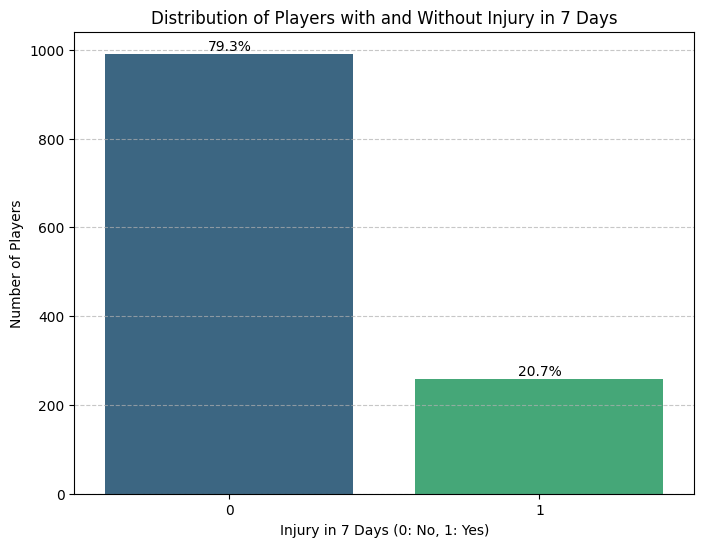

In [15]:
# Create a bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='injury_7d', data=df, palette='viridis')

# Add title and labels
plt.title('Distribution of Players with and Without Injury in 7 Days')
plt.xlabel('Injury in 7 Days (0: No, 1: Yes)')
plt.ylabel('Number of Players')

# Annotate bars with percentages
for index, count in enumerate(injury_counts):
    percentage = injury_percentages[index]
    plt.text(index, count + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **Frequency Table for Fatigue**

In [16]:
# Calculate frequency and percentages for 'fatigue_level'
fatigue_counts = df['fatigue_level'].value_counts().sort_index()
fatigue_percentages = df['fatigue_level'].value_counts(normalize=True).mul(100).sort_index()

# Create a DataFrame for the frequency table
frequency_table = pd.DataFrame({
    'Fatigue Level': fatigue_counts.index,
    'Frequency': fatigue_counts.values,
    'Percentage': fatigue_percentages.values
})

# Calculate Cumulative Frequency (CF)
frequency_table['Cumulative Frequency (CF)'] = frequency_table['Frequency'].cumsum()

In [17]:
# Display the frequency table
frequency_table

,Fatigue Level,Frequency,Percentage,Cumulative Frequency (CF)
0,1,330,26.40,330
1,2,393,31.44,723
2,3,243,19.44,966
3,4,160,12.80,1126
4,5,124,9.92,1250


### **Bar Chart of Fatigue Levels**

/tmp/ipython-input-2093079985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fatigue Level', y='Frequency', data=frequency_table, palette='viridis')


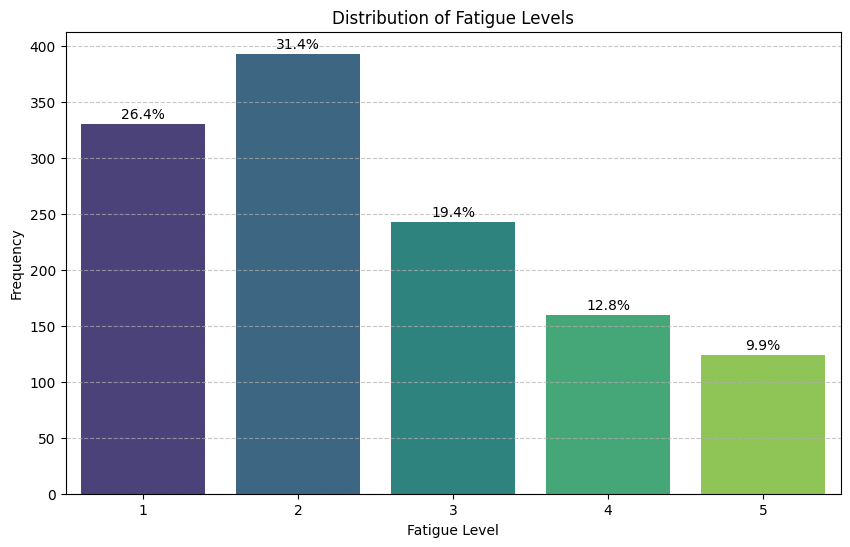

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fatigue Level', y='Frequency', data=frequency_table, palette='viridis')

plt.title('Distribution of Fatigue Levels')
plt.xlabel('Fatigue Level')
plt.ylabel('Frequency')

# Annotate bars with percentages
for index, row in frequency_table.iterrows():
    plt.text(index, row['Frequency'] + 5, f"{row['Percentage']:.1f}%", color='black', ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **MACHINE LEARNING MODELING**

### **Check for Variables with Near Zero Variance**

#### **Convert all the Object Variables to Appropriate Format**

In [19]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'session_type' and 'position' columns to categorical type
df['session_type'] = df['session_type'].astype('category')
df['position'] = df['position'].astype('category')

# Display data types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   athlete_id              1250 non-null   int64         
 1   session_id              1250 non-null   int64         
 2   date                    1250 non-null   datetime64[ns]
 3   session_type            1250 non-null   category      
 4   total_distance          1250 non-null   float64       
 5   high_speed_running      1250 non-null   float64       
 6   sprint_count            1250 non-null   int64         
 7   accelerations           1250 non-null   int64         
 8   decelerations           1250 non-null   int64         
 9   player_load             1250 non-null   float64       
 10  metabolic_power         1250 non-null   float64       
 11  heart_rate              1250 non-null   int64         
 12  hrv                     1250 non-null   float64 

In [20]:
from sklearn.feature_selection import VarianceThreshold
X = df.drop(df.columns[[0, 2, 3, 23, 26]], axis=1)

In [21]:
X.head()

,session_id,total_distance,high_speed_running,sprint_count,accelerations,decelerations,player_load,metabolic_power,heart_rate,hrv,...,sleep_duration,sleep_quality,muscle_soreness,acute_workload,chronic_workload,acwr,prior_injury,match_congestion,sport_specific_actions,fatigue_level
0,1,8960.604971,1933.939315,3,14,52,457.109899,10.511742,162,57.605879,...,7.987318,4,3,1767.873170,2066.392680,0.855536,1,0,10,2
1,2,6385.470435,1033.898426,17,20,47,621.910862,9.960755,146,54.562830,...,6.895827,5,2,1669.738823,2183.442497,0.764728,1,0,8,2
2,3,6638.578288,1206.402746,10,45,40,742.171971,6.850347,149,70.386988,...,7.952759,5,1,1723.898785,2000.451542,0.861755,1,0,6,1
3,4,6719.630505,1864.922662,11,55,17,467.359520,9.088692,140,59.068730,...,8.975705,5,1,1722.654790,2150.161377,0.801175,1,0,0,1
4,5,7664.646126,1341.665114,13,23,6,196.008395,4.941556,135,72.783850,...,5.874589,2,1,1500.000000,2277.718251,0.658554,1,0,16,3


#### **Check for Zero Variance**

In [22]:
# Calculate variance for each feature
variance = X.var()
variance

,0
session_id,5.204163e+01
total_distance,3.121162e+06
high_speed_running,2.884739e+05
sprint_count,7.206253e+01
accelerations,3.308444e+02
decelerations,3.021567e+02
player_load,6.302610e+04
metabolic_power,6.579257e+00
heart_rate,2.258455e+02
hrv,1.086722e+02


In [23]:
# Identify zero variance predictors
zero_variance_mask = variance == 0
zero_variance_mask

,0
session_id,False
total_distance,False
high_speed_running,False
sprint_count,False
accelerations,False
decelerations,False
player_load,False
metabolic_power,False
heart_rate,False
hrv,False


In [24]:
# Create a DataFrame showing the variance metrics
variance_metrics = pd.DataFrame({
    'Feature': X.columns,
    'Variance': variance,
    'ZeroVariance': zero_variance_mask  # True if zero variance
})

# Print the results
variance_metrics[variance_metrics['ZeroVariance'] == True]

,Feature,Variance,ZeroVariance


#### **Check the Variables with Near Zero Variance**

In [25]:
selector = VarianceThreshold(threshold=1e-4) # threshold = 0.0004

# Fit the model to find near-zero variance predictors
selector.fit(X)

# Get the boolean mask indicating which columns have non-zero variance
non_zero_variance_mask = selector.get_support()
non_zero_variance_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [26]:
# Create a DataFrame showing the variance metrics
nzv_metrics = pd.DataFrame({
    'Feature': X.columns,
    'Variance': X.var(),
    'NearZeroVariance': ~non_zero_variance_mask  # True if near-zero variance
})

In [27]:
nzv_metrics

,Feature,Variance,NearZeroVariance
session_id,session_id,5.204163e+01,False
total_distance,total_distance,3.121162e+06,False
high_speed_running,high_speed_running,2.884739e+05,False
sprint_count,sprint_count,7.206253e+01,False
accelerations,accelerations,3.308444e+02,False
decelerations,decelerations,3.021567e+02,False
player_load,player_load,6.302610e+04,False
metabolic_power,metabolic_power,6.579257e+00,False
heart_rate,heart_rate,2.258455e+02,False
hrv,hrv,1.086722e+02,False


#### **Check all the Available Models**

In [28]:
from sklearn.utils import all_estimators
# Get all classifiers and regressors
estimators = all_estimators()
# Extract the names of the models
model_names = [name for name, _ in estimators]
# Display the list of model names
print(model_names)

['ARDRegression', 'AdaBoostClassifier', 'AdaBoostRegressor', 'AdditiveChi2Sampler', 'AffinityPropagation', 'AgglomerativeClustering', 'BaggingClassifier', 'BaggingRegressor', 'BayesianGaussianMixture', 'BayesianRidge', 'BernoulliNB', 'BernoulliRBM', 'Binarizer', 'Birch', 'BisectingKMeans', 'CCA', 'CalibratedClassifierCV', 'CategoricalNB', 'ClassifierChain', 'ColumnTransformer', 'ComplementNB', 'CountVectorizer', 'DBSCAN', 'DecisionTreeClassifier', 'DecisionTreeRegressor', 'DictVectorizer', 'DictionaryLearning', 'DummyClassifier', 'DummyRegressor', 'ElasticNet', 'ElasticNetCV', 'EllipticEnvelope', 'EmpiricalCovariance', 'ExtraTreeClassifier', 'ExtraTreeRegressor', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'FactorAnalysis', 'FastICA', 'FeatureAgglomeration', 'FeatureHasher', 'FeatureUnion', 'FixedThresholdClassifier', 'FrozenEstimator', 'FunctionTransformer', 'GammaRegressor', 'GaussianMixture', 'GaussianNB', 'GaussianProcessClassifier', 'GaussianProcessRegressor', 'GaussianRandomPr

#### **Select the Ten Most Important Predictor of Injury**

In [29]:
y = df['injury_7d']
print("Target variable 'y' created successfully.")
print(f"Feature set X contains 'injury_7d': {'injury_7d' in X.columns}")

Target variable 'y' created successfully.
Feature set X contains 'injury_7d': False


In [30]:
y.head()

,injury_7d
0,0
1,0
2,0
3,0
4,0


In [31]:
X.head()

,session_id,total_distance,high_speed_running,sprint_count,accelerations,decelerations,player_load,metabolic_power,heart_rate,hrv,...,sleep_duration,sleep_quality,muscle_soreness,acute_workload,chronic_workload,acwr,prior_injury,match_congestion,sport_specific_actions,fatigue_level
0,1,8960.604971,1933.939315,3,14,52,457.109899,10.511742,162,57.605879,...,7.987318,4,3,1767.873170,2066.392680,0.855536,1,0,10,2
1,2,6385.470435,1033.898426,17,20,47,621.910862,9.960755,146,54.562830,...,6.895827,5,2,1669.738823,2183.442497,0.764728,1,0,8,2
2,3,6638.578288,1206.402746,10,45,40,742.171971,6.850347,149,70.386988,...,7.952759,5,1,1723.898785,2000.451542,0.861755,1,0,6,1
3,4,6719.630505,1864.922662,11,55,17,467.359520,9.088692,140,59.068730,...,8.975705,5,1,1722.654790,2150.161377,0.801175,1,0,0,1
4,5,7664.646126,1341.665114,13,23,6,196.008395,4.941556,135,72.783850,...,5.874589,2,1,1500.000000,2277.718251,0.658554,1,0,16,3


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

print("RandomForestClassifier model initialized and trained successfully.")

RandomForestClassifier model initialized and trained successfully.


#### **View the Attributes in the Random Forest Model**

In [33]:
dir(rf_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_n_samples',
 '_n_samples_bootstrap',
 '_parameter_c

In [34]:
feature_importances = rf_model.feature_importances_
feature_importances

array([0.04196486, 0.05754626, 0.04717416, 0.03978671, 0.04684209,
       0.05046233, 0.04934449, 0.05500937, 0.04632161, 0.05792764,
       0.0441795 , 0.04745693, 0.05665278, 0.01727245, 0.02160603,
       0.05810435, 0.05178615, 0.11081508, 0.01073076, 0.00700262,
       0.03965002, 0.0423638 ])

In [35]:
# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
importances_df

,Feature,Importance
0,session_id,0.041965
1,total_distance,0.057546
2,high_speed_running,0.047174
3,sprint_count,0.039787
4,accelerations,0.046842
5,decelerations,0.050462
6,player_load,0.049344
7,metabolic_power,0.055009
8,heart_rate,0.046322
9,hrv,0.057928


In [36]:
# Sort the features by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df.head(10)

,Feature,Importance
17,acwr,0.110815
15,acute_workload,0.058104
9,hrv,0.057928
1,total_distance,0.057546
12,sleep_duration,0.056653
7,metabolic_power,0.055009
16,chronic_workload,0.051786
5,decelerations,0.050462
6,player_load,0.049344
11,srpe,0.047457


#### **Recreate the X-Object with Ten Most Important Features**

In [37]:
# Get the names of the top 10 most important features
top_10_features = importances_df.head(10)['Feature'].tolist()
top_10_features

['acwr',
 'acute_workload',
 'hrv',
 'total_distance',
 'sleep_duration',
 'metabolic_power',
 'chronic_workload',
 'decelerations',
 'player_load',
 'srpe']

In [38]:
df.head()

,athlete_id,session_id,date,session_type,total_distance,high_speed_running,sprint_count,accelerations,decelerations,player_load,...,muscle_soreness,acute_workload,chronic_workload,acwr,prior_injury,match_congestion,position,sport_specific_actions,fatigue_level,injury_7d
0,1,1,2025-01-01,training,8960.604971,1933.939315,3,14,52,457.109899,...,3,1767.873170,2066.392680,0.855536,1,0,midfielder,10,2,0
1,1,2,2025-01-02,training,6385.470435,1033.898426,17,20,47,621.910862,...,2,1669.738823,2183.442497,0.764728,1,0,midfielder,8,2,0
2,1,3,2025-01-03,training,6638.578288,1206.402746,10,45,40,742.171971,...,1,1723.898785,2000.451542,0.861755,1,0,midfielder,6,1,0
3,1,4,2025-01-04,training,6719.630505,1864.922662,11,55,17,467.359520,...,1,1722.654790,2150.161377,0.801175,1,0,midfielder,0,1,0
4,1,5,2025-01-05,training,7664.646126,1341.665114,13,23,6,196.008395,...,1,1500.000000,2277.718251,0.658554,1,0,midfielder,16,3,0


In [39]:
# Recreate the X-object with only the top 10 features
X = df[top_10_features]

print(f"X-object recreated with {len(X.columns)} features: {X.columns.tolist()}")

X-object recreated with 10 features: ['acwr', 'acute_workload', 'hrv', 'total_distance', 'sleep_duration', 'metabolic_power', 'chronic_workload', 'decelerations', 'player_load', 'srpe']


#### **View the First Few  Observations for the Predictor Variables**

In [40]:
X.head()

,acwr,acute_workload,hrv,total_distance,sleep_duration,metabolic_power,chronic_workload,decelerations,player_load,srpe
0,0.855536,1767.873170,57.605879,8960.604971,7.987318,10.511742,2066.392680,52,457.109899,272
1,0.764728,1669.738823,54.562830,6385.470435,6.895827,9.960755,2183.442497,47,621.910862,316
2,0.861755,1723.898785,70.386988,6638.578288,7.952759,6.850347,2000.451542,40,742.171971,153
3,0.801175,1722.654790,59.068730,6719.630505,8.975705,9.088692,2150.161377,17,467.359520,115
4,0.658554,1500.000000,72.783850,7664.646126,5.874589,4.941556,2277.718251,6,196.008395,149


#### **View the First Few Observations for the Predicted Variable**

In [41]:
y.head()

,injury_7d
0,0
1,0
2,0
3,0
4,0


#### **Split the Dataset into Training and Testing  for KNN Model Development**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   athlete_id              1250 non-null   int64         
 1   session_id              1250 non-null   int64         
 2   date                    1250 non-null   datetime64[ns]
 3   session_type            1250 non-null   category      
 4   total_distance          1250 non-null   float64       
 5   high_speed_running      1250 non-null   float64       
 6   sprint_count            1250 non-null   int64         
 7   accelerations           1250 non-null   int64         
 8   decelerations           1250 non-null   int64         
 9   player_load             1250 non-null   float64       
 10  metabolic_power         1250 non-null   float64       
 11  heart_rate              1250 non-null   int64         
 12  hrv                     1250 non-null   float64 

In [43]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 1000 samples
Testing set size: 250 samples
Number of features: 10


# 📌 **Estimate the KNN Model**

## 1️⃣ What is KNN?

**K-Nearest Neighbors (KNN)** is a **supervised learning algorithm** used for:

* ✅ Classification
* ✅ Regression

It is a **non-parametric, instance-based (lazy learning)** algorithm.

👉 It makes predictions based on the **k closest data points** in the training set.

---

## 2️⃣ Key Idea

To classify a new point:

1. Choose a value for **k**
2. Compute distance between the new point and all training points
3. Select the **k nearest neighbors**
4. Use:

   * **Majority vote** (classification)
   * **Average value** (regression)

---

## 3️⃣ Distance Metrics

KNN relies on distance measurement.

### 🔹 Euclidean Distance (Most Common)

$$
d = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

---

### 🔹 Manhattan Distance

$$
d = \sum_{i=1}^{n} |x_i - y_i|
$$

---

### 🔹 Minkowski Distance

$$
d = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}
$$

* ( p = 1 ) → Manhattan
* ( p = 2 ) → Euclidean

---

## 4️⃣ Choosing K

* Small **k** → High variance, low bias (overfitting)
* Large **k** → Low variance, high bias (underfitting)

📌 Common practice:

* Use odd values (to avoid ties in binary classification)
* Use cross-validation to find best k

---

## 5️⃣ Classification Rule

For binary classification:

$$
\hat{y} = \text{mode}(y_1, y_2, ..., y_k)
$$

The predicted class is the **majority class** among neighbors.

---

## 6️⃣ Regression Rule

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i
$$

Prediction is the **average** of the k nearest values.

---

## 7️⃣ Algorithm Steps

1. Store training dataset
2. For a new sample:

   * Compute distances
   * Sort distances
   * Pick k nearest
   * Predict

---

## 8️⃣ Advantages

✅ Simple to understand
✅ No training phase (lazy learning)
✅ Works well with small datasets
✅ Handles nonlinear boundaries

---

## 9️⃣ Disadvantages

❌ Slow for large datasets
❌ Sensitive to irrelevant features
❌ Sensitive to feature scaling
❌ Memory intensive

---

## 🔟 Importance of Feature Scaling

Since KNN uses distance:

If one feature has larger scale, it dominates.

Example:

* Age (0–100)
* Income (0–1,000,000)

Income will dominate distance.

📌 Solution:

* Standardization
* Normalization

Example in sklearn:

```python
from sklearn.preprocessing import StandardScaler
```

---

## 1️⃣1️⃣ Time Complexity

Training:
$$
O(1)
$$

Prediction:
$$
O(n \cdot d)
$$

Where:

* ( n ) = number of training samples
* ( d ) = number of features

---

## 1️⃣2️⃣ Weighted KNN

Instead of equal voting:

$$
w_i = \frac{1}{d_i}
$$

Closer neighbors get higher weight.

---

## 1️⃣3️⃣ KNN vs Decision Tree

| Feature          | KNN            | Decision Tree    |
| ---------------- | -------------- | ---------------- |
| Training time    | Very low       | Moderate         |
| Prediction time  | Slow           | Fast             |
| Interpretability | Low            | High             |
| Scaling needed   | Yes            | No               |
| Overfitting risk | High (small k) | High (deep tree) |

---

## 1️⃣4️⃣ Real-World Applications

* Image recognition
* Recommendation systems
* Fraud detection
* Medical diagnosis
* Pattern recognition

---

# 📌 Summary

KNN:

* Stores data
* Uses distance to find nearest neighbors
* Classifies by majority vote
* Regresses by averaging
* Requires proper feature scaling
* Sensitive to choice of k

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

### Initialize the Training of the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)

### Train the Model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

#### **Predict using the KNN Estimated Model**

In [45]:
dir(knn_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_valida

In [46]:
# Make predictions
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [48]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7600


In [49]:
print(conf_matrix)

[[176  16]
 [ 44  14]]


In [50]:
acc = (176 + 14)/(176+14+44+16)
acc

0.76

In [51]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       192
           1       0.47      0.24      0.32        58

    accuracy                           0.76       250
   macro avg       0.63      0.58      0.59       250
weighted avg       0.72      0.76      0.73       250



The KNN model achieved an overall classification accuracy of 76% on the test dataset (n = 250).

For Class 0, the model demonstrated strong performance, with a precision of 0.80, recall of 0.92, and an F1-score of 0.85, correctly identifying the majority of instances in this class (support = 192). This indicates that the model is highly effective in predicting the majority class.

However, performance for Class 1 was considerably lower. The model achieved a precision of 0.47, recall of 0.24, and an F1-score of 0.32 (support = 58). The low recall suggests that the model failed to correctly identify a substantial proportion of Class 1 instances, indicating difficulty in detecting the minority class.

The macro-average F1-score was 0.59, reflecting moderate overall performance when treating both classes equally. The weighted-average F1-score was 0.73, influenced by the strong performance on the majority class.

Overall, while the KNN model performs well in predicting Class 0, its limited sensitivity toward Class 1 suggests potential class imbalance issues and indicates a need for further model tuning or resampling techniques to improve minority class detection.

#### **Confusion Matrix Plot**

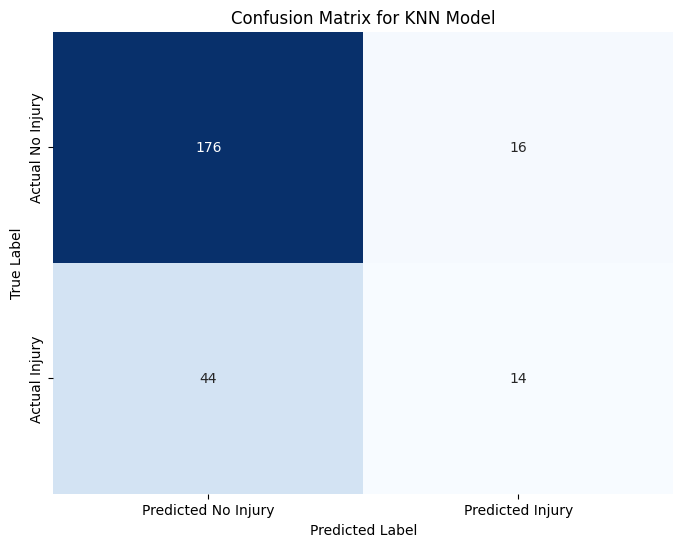

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Injury', 'Predicted Injury'],
            yticklabels=['Actual No Injury', 'Actual Injury'])
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix for the KNN model further explains the classification performance. Out of 192 actual “No Injury” cases, 176 were correctly classified as No Injury (true negatives), while 16 were incorrectly classified as Injury (false positives). This indicates strong performance in identifying non-injury cases.

However, for the 58 actual “Injury” cases, only 14 were correctly predicted as Injury (true positives), while 44 were misclassified as No Injury (false negatives). The high number of false negatives shows that the model struggles to correctly detect injury cases.

These results align with the classification report, where recall for the Injury class was low (0.24). Although the overall accuracy is 76%, the model is biased toward the majority class (No Injury). Therefore, while KNN performs well for predicting non-injury outcomes, its limited sensitivity in identifying injuries suggests the need for class balancing or parameter tuning.


#### **ROC and AUC Value**

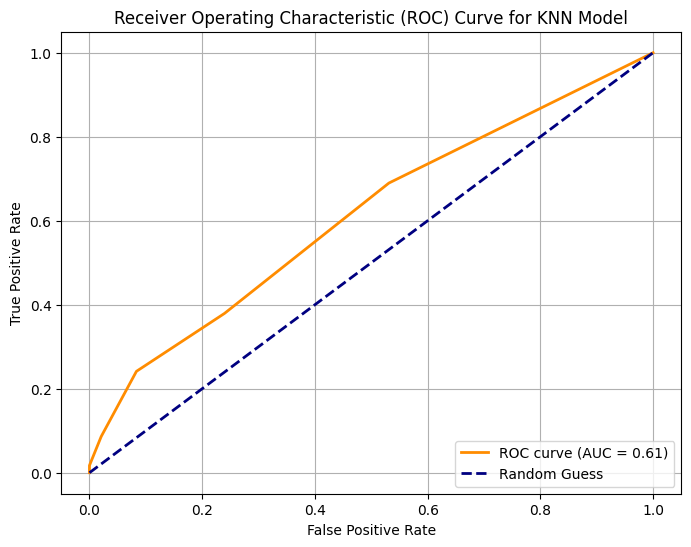

AUC for KNN Model: 0.6117


In [53]:
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for KNN Model: {roc_auc:.4f}")

The ROC curve for the KNN model shows the trade-off between the true positive rate (sensitivity) and the false positive rate across different classification thresholds. The model achieved an Area Under the Curve (AUC) of 0.61, indicating modest discriminative ability. Since an AUC of 0.50 represents random guessing, a value of 0.61 suggests that the model performs only slightly better than chance in distinguishing between Injury and No Injury cases.

The curve lies only marginally above the diagonal reference line, further confirming limited predictive power. This result aligns with the earlier findings of low recall for the Injury class. Overall, while KNN demonstrates reasonable performance for the majority class, its ability to effectively separate the two classes remains weak and may require further optimization or alternative modeling approaches.

#### **Feature Importance Plot**

/tmp/ipython-input-1615767042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df.head(10), palette='viridis')


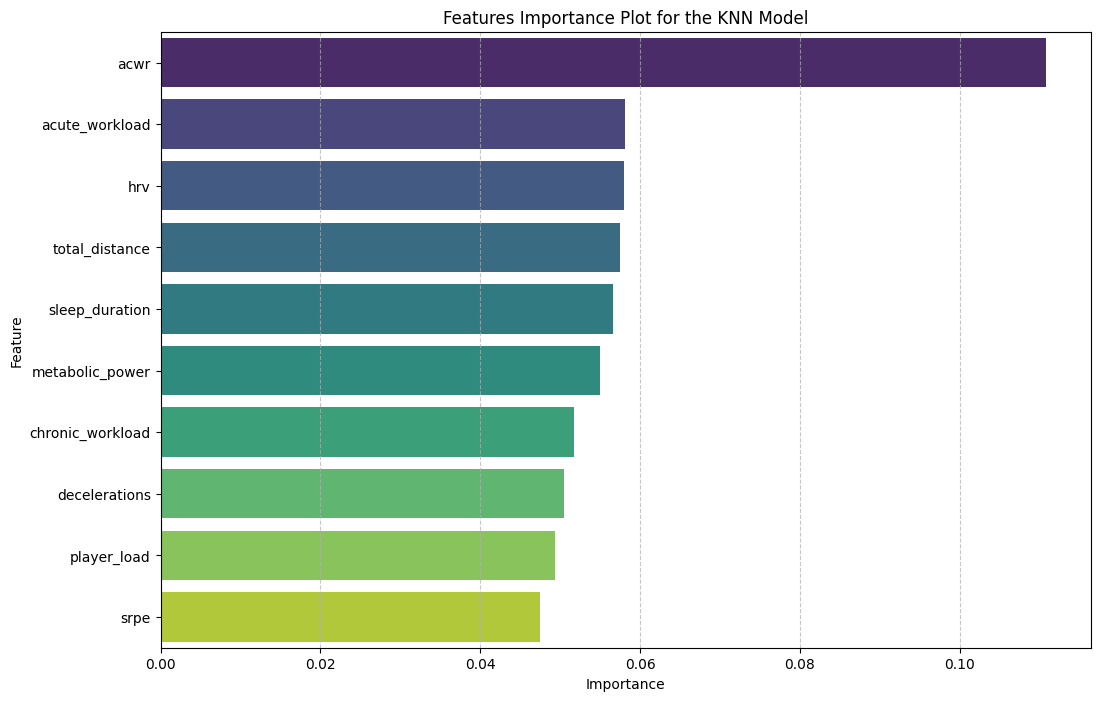

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10), palette='viridis')
plt.title('Features Importance Plot for the KNN Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The feature importance plot for the KNN model, derived using permutation importance, highlights the relative contribution of each predictor variable to model performance. The most influential feature is **ACWR (Acute:Chronic Workload Ratio)**, with the highest importance score, indicating that variations in workload balance play a critical role in predicting injury risk. This suggests that sudden increases in training load relative to chronic load strongly affect classification outcomes.

Following ACWR, **acute_workload**, **heart rate variability (HRV)**, **total_distance**, and **sleep_duration** show moderate importance values. These variables are closely related to athlete workload, physiological recovery, and physical output, reinforcing their relevance in injury prediction models.

Other features such as **metabolic_power**, **chronic_workload**, **decelerations**, **player_load**, and **session RPE (srpe)** demonstrate comparatively lower but still meaningful contributions. Although their individual effects are smaller, they collectively support the predictive structure of the model.

Overall, the distribution of importance scores indicates that workload-related variables dominate the predictive process. However, given the modest ROC-AUC observed earlier, these predictors may not sufficiently separate injury from non-injury cases, suggesting potential non-linear relationships or the need for alternative modeling techniques.


## **Support Vector Machines (SVM)**

### **Support Vector Machine (SVM) – Overview**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. In this study, SVM is applied to classify players into **Injury (1)** and **No Injury (0)** categories based on workload, physiological, and performance-related features.

SVM works by identifying an optimal hyperplane that maximizes the margin between the two classes. The data points closest to this boundary are called **support vectors**, and they determine the position of the decision boundary.

---

### **Application to the Injury Dataset**

Given that the dataset contains continuous workload variables (e.g., ACWR, acute workload, HRV, sleep duration), SVM is suitable because:

* It performs well in high-dimensional feature spaces.
* It is effective when classes are not linearly separable (using kernel functions such as RBF).
* It is robust to overfitting, especially with proper regularization (C parameter).

---

### **Important Parameters**

* **Kernel** (Linear, RBF, Polynomial)
* **C (Regularization parameter)** – controls margin width
* **Gamma (for RBF kernel)** – controls influence of individual points

---

### **Expectation for This Dataset**

Since KNN showed moderate performance and class imbalance issues, SVM with an RBF kernel and class weighting may improve minority class (Injury) detection and overall discrimination.


In [60]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier with a linear kernel and balanced class weights
svm_model = SVC(random_state=42, probability=True, class_weight = 'balanced')

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

#### **Alterrnative SVM Training Process**

In [58]:
from sklearn.svm import LinearSVC
svm_model1 = LinearSVC(class_weight='balanced', random_state=42)


In [59]:
svm_model1.fit(X_train, y_train)

LinearSVC(class_weight='balanced', random_state=42)

### **Explanation of the SVM Code**

The code above initializes and trains a **Support Vector Machine (SVM)** classifier using Scikit-learn.

#### 1️⃣ Importing the Model

```python
from sklearn.svm import SVC
```

This imports the **Support Vector Classifier (SVC)** class, which is used for classification tasks.

---

#### 2️⃣ Initializing the Model

```python
svm_model = SVC(kernel='linear', probability=True, random_state=42, class_weight='balanced')
```

This creates the SVM model with the following settings:

* **kernel='linear'**
  The model will use a linear decision boundary (a straight line or hyperplane).

* **probability=True**
  Enables probability estimates (e.g., `predict_proba()`), which are required for ROC curves and AUC calculation.

* **random_state=42**
  Ensures reproducibility of results.

* **class_weight='balanced'**
  Automatically adjusts weights inversely proportional to class frequencies.
  This is important because the dataset has class imbalance (more No Injury than Injury cases).

---

#### 3️⃣ Training the Model

```python
svm_model.fit(X_train, y_train)
```

This trains the SVM using the training feature matrix (`X_train`) and corresponding labels (`y_train`).
The model learns the optimal hyperplane that separates Injury and No Injury cases.

---

### Summary

This code builds a linear SVM model that accounts for class imbalance and is trained to classify injury vs. no-injury cases.


#### **Prediction**

In [71]:
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1])

##### **Model Performance Metrics**

In [72]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Model Accuracy: {accuracy_svm:.4f}")
print("\nSVM Model Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM Model Classification Report:")
print(class_report_svm)

SVM Model Accuracy: 0.6680

SVM Model Confusion Matrix:
[[138  54]
 [ 29  29]]

SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       192
           1       0.35      0.50      0.41        58

    accuracy                           0.67       250
   macro avg       0.59      0.61      0.59       250
weighted avg       0.72      0.67      0.69       250



The Support Vector Machine (SVM) model achieved an overall accuracy of **66.8%** on the test dataset (n = 250). From the confusion matrix, 138 out of 192 actual *No Injury* cases were correctly classified (true negatives), while 54 were incorrectly predicted as injuries (false positives). For the *Injury* class, 29 out of 58 cases were correctly identified (true positives), and 29 were misclassified as no injury (false negatives).

The classification report shows strong performance for Class 0, with a precision of **0.83**, recall of **0.72**, and F1-score of **0.77**. For Class 1 (Injury), the model achieved a precision of **0.35**, recall of **0.50**, and F1-score of **0.41**. Compared to KNN, SVM improved recall for the minority Injury class but reduced overall accuracy. The macro-average F1-score of **0.59** indicates moderate balanced performance, suggesting improved sensitivity but continued challenges in accurately distinguishing injury cases.


#### **Confusion  Matrix Plot**

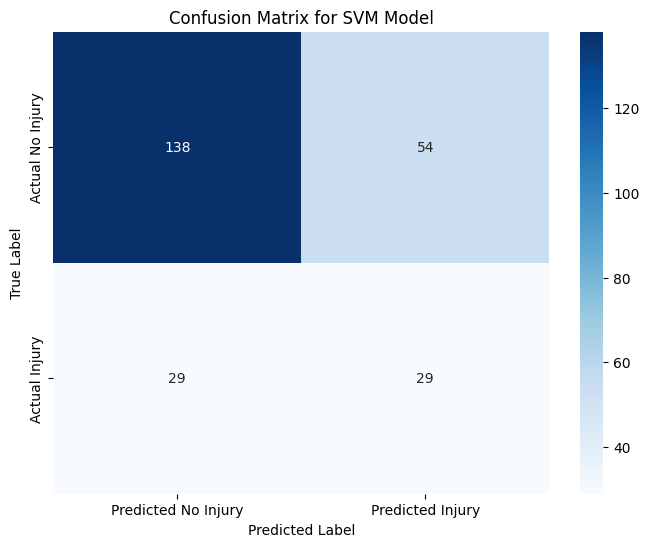

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Injury', 'Predicted Injury'],
            yticklabels=['Actual No Injury', 'Actual Injury'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### **ROC Curve and AUC**

In [76]:
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

### 1️⃣ Getting Predicted Probabilities

```python
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
```

* `predict_proba(X_test)` returns the probability of each class for every observation in the test set.
* The output has two columns:

  * Column 0 → Probability of Class 0 (No Injury)
  * Column 1 → Probability of Class 1 (Injury)
* `[:, 1]` selects only the probabilities for the **positive class (Injury)**.

This step extracts the predicted probabilities of the Injury class, which are required to compute the ROC curve.

---

### 2️⃣ Computing ROC Curve Values

```python
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
```

This calculates:

* **FPR (False Positive Rate)**
* **TPR (True Positive Rate / Recall)**
* **Thresholds** used to classify probabilities into classes

The ROC curve shows how sensitivity and specificity change across thresholds.

---

### 3️⃣ Calculating AUC

```python
roc_auc_svm = auc(fpr_svm, tpr_svm)
```

This computes the **Area Under the Curve (AUC)**, which summarizes the model’s ability to distinguish between Injury and No Injury. Higher AUC indicates better discrimination performance.


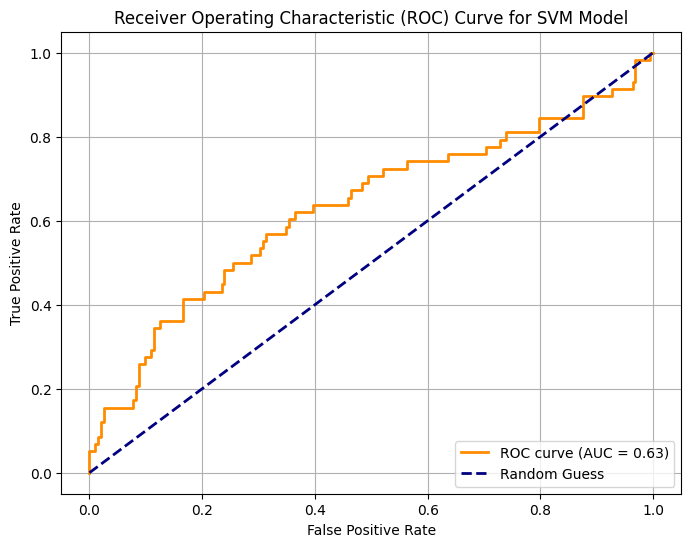

AUC for SVM Model: 0.6301


In [77]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for SVM Model: {roc_auc_svm:.4f}")

# 🌳 **Decision Tree**

## 1️⃣ What is a Decision Tree?

A **Decision Tree** is a **supervised machine learning algorithm** used for:

* ✅ Classification (e.g., Injury vs No Injury)
* ✅ Regression (predicting continuous values)

It splits data into branches based on feature values to make predictions.

It looks like a flowchart:

* Root node → Decision nodes → Leaf nodes

---

## 2️⃣ Key Terminology

### 🔹 Root Node

* The first split of the dataset.
* Represents the most important feature.

### 🔹 Decision Node

* A node where the data is split based on a condition.
* Example: `Age ≤ 35`

### 🔹 Leaf Node (Terminal Node)

* Final output (prediction).
* Example: "Injury"

### 🔹 Branch

* Outcome of a split.

### 🔹 Depth

* Number of levels in the tree.
* Larger depth = more complex tree.

---

## 3️⃣ How Decision Trees Work

Decision trees split the dataset using a criterion that measures impurity.

At each node:

1. Try different splits
2. Calculate impurity
3. Choose the split that reduces impurity the most

This process continues until:

* Maximum depth is reached
* All samples belong to one class
* Minimum samples per split condition is met

---

## 4️⃣ Splitting Criteria (Impurity Measures)

### 📌 For Classification

### 🔹 Gini Index

Most common in sklearn.

Formula:
$$
Gini = 1 - \sum p_i^2
$$

* 0 = pure node
* Higher value = more mixed classes

---

### 🔹 Entropy (Information Gain)

Based on information theory.

$$
Entropy = -\sum p_i \log_2(p_i)
$$

Information Gain:
$$
IG = Entropy(parent) - Weighted\ Entropy(children)
$$

Higher information gain = better split.

---

### 📌 For Regression

### 🔹 Mean Squared Error (MSE)

Measures variance in continuous values.

---

## 5️⃣ Pruning (Controlling Overfitting)

Decision trees easily overfit.

### 🔹 Overfitting

* Model learns noise
* Performs well on training data
* Poor performance on test data

### 🔹 Methods to Prevent Overfitting

| Parameter           | Purpose                         |
| ------------------- | ------------------------------- |
| `max_depth`         | Maximum levels of tree          |
| `min_samples_split` | Minimum samples needed to split |
| `min_samples_leaf`  | Minimum samples in leaf         |
| `max_leaf_nodes`    | Limit number of leaf nodes      |

Example:

```python
DecisionTreeClassifier(max_depth=4)
```

This creates a **pruned tree**.

---

## 6️⃣ Advantages of Decision Trees

✅ Easy to understand
✅ Easy to visualize
✅ No need for feature scaling
✅ Works with numerical and categorical data
✅ Handles nonlinear relationships

---

## 7️⃣ Disadvantages

❌ Prone to overfitting
❌ Unstable (small data changes → different tree)
❌ Can be biased toward dominant classes

---

## 8️⃣ Feature Importance

Decision trees can rank features by importance.

* Features that reduce impurity more are more important.
* In sklearn:

```python
model.feature_importances_
```

---

## 9️⃣ Decision Tree Example

Suppose predicting Injury:

Root node:

```
Speed ≤ 60?
```

If YES → Low Risk
If NO → Check Experience

This continues until prediction is made.

---

## 🔟 Decision Tree vs Other Models

| Model               | Interpretation | Overfitting Risk |
| ------------------- | -------------- | ---------------- |
| Logistic Regression | Medium         | Low              |
| Decision Tree       | Very High      | High             |
| Random Forest       | Low            | Low              |
| Gradient Boosting   | Low            | Medium           |

---

## 1️⃣1️⃣ Real-World Applications

* Medical diagnosis
* Credit risk analysis
* Fraud detection
* Customer churn prediction
* Accident prediction

---

# 📌 Summary

A Decision Tree:

* Splits data using impurity measures
* Creates a tree-like structure
* Is easy to interpret
* Needs pruning to avoid overfitting
* Is the foundation for Random Forest & Boosting models


In [79]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with balanced class weights
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

#### **Prediction**

In [80]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0])

#### **Model's Performance Metrics**

In [81]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Model Accuracy: {accuracy_dt:.4f}")
print("\nDecision Tree Model Confusion Matrix:")
print(conf_matrix_dt)
print("\nDecision Tree Model Classification Report:")
print(class_report_dt)

Decision Tree Model Accuracy: 0.7240

Decision Tree Model Confusion Matrix:
[[166  26]
 [ 43  15]]

Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       192
           1       0.37      0.26      0.30        58

    accuracy                           0.72       250
   macro avg       0.58      0.56      0.57       250
weighted avg       0.69      0.72      0.71       250



#### **Confusion Matrix Plot**

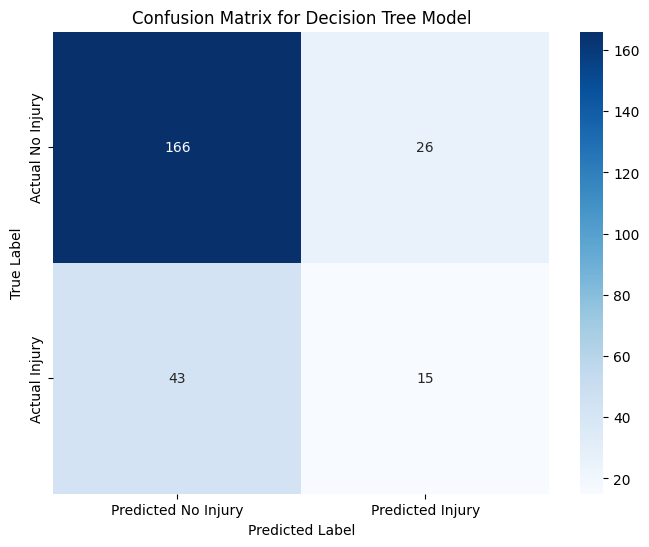

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Injury', 'Predicted Injury'],
            yticklabels=['Actual No Injury', 'Actual Injury'])
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### **ROC and AUC Curve**

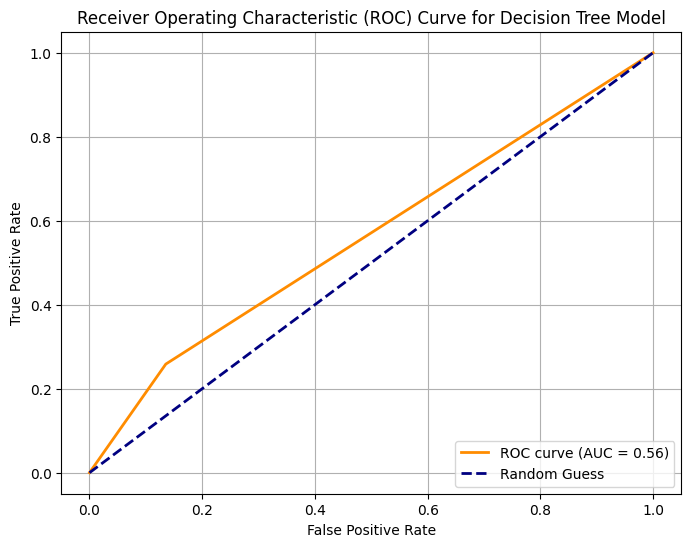

AUC for Decision Tree Model: 0.5616


In [93]:
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for Decision Tree Model: {roc_auc_dt:.4f}")

#### **Plot the Decision Tree**

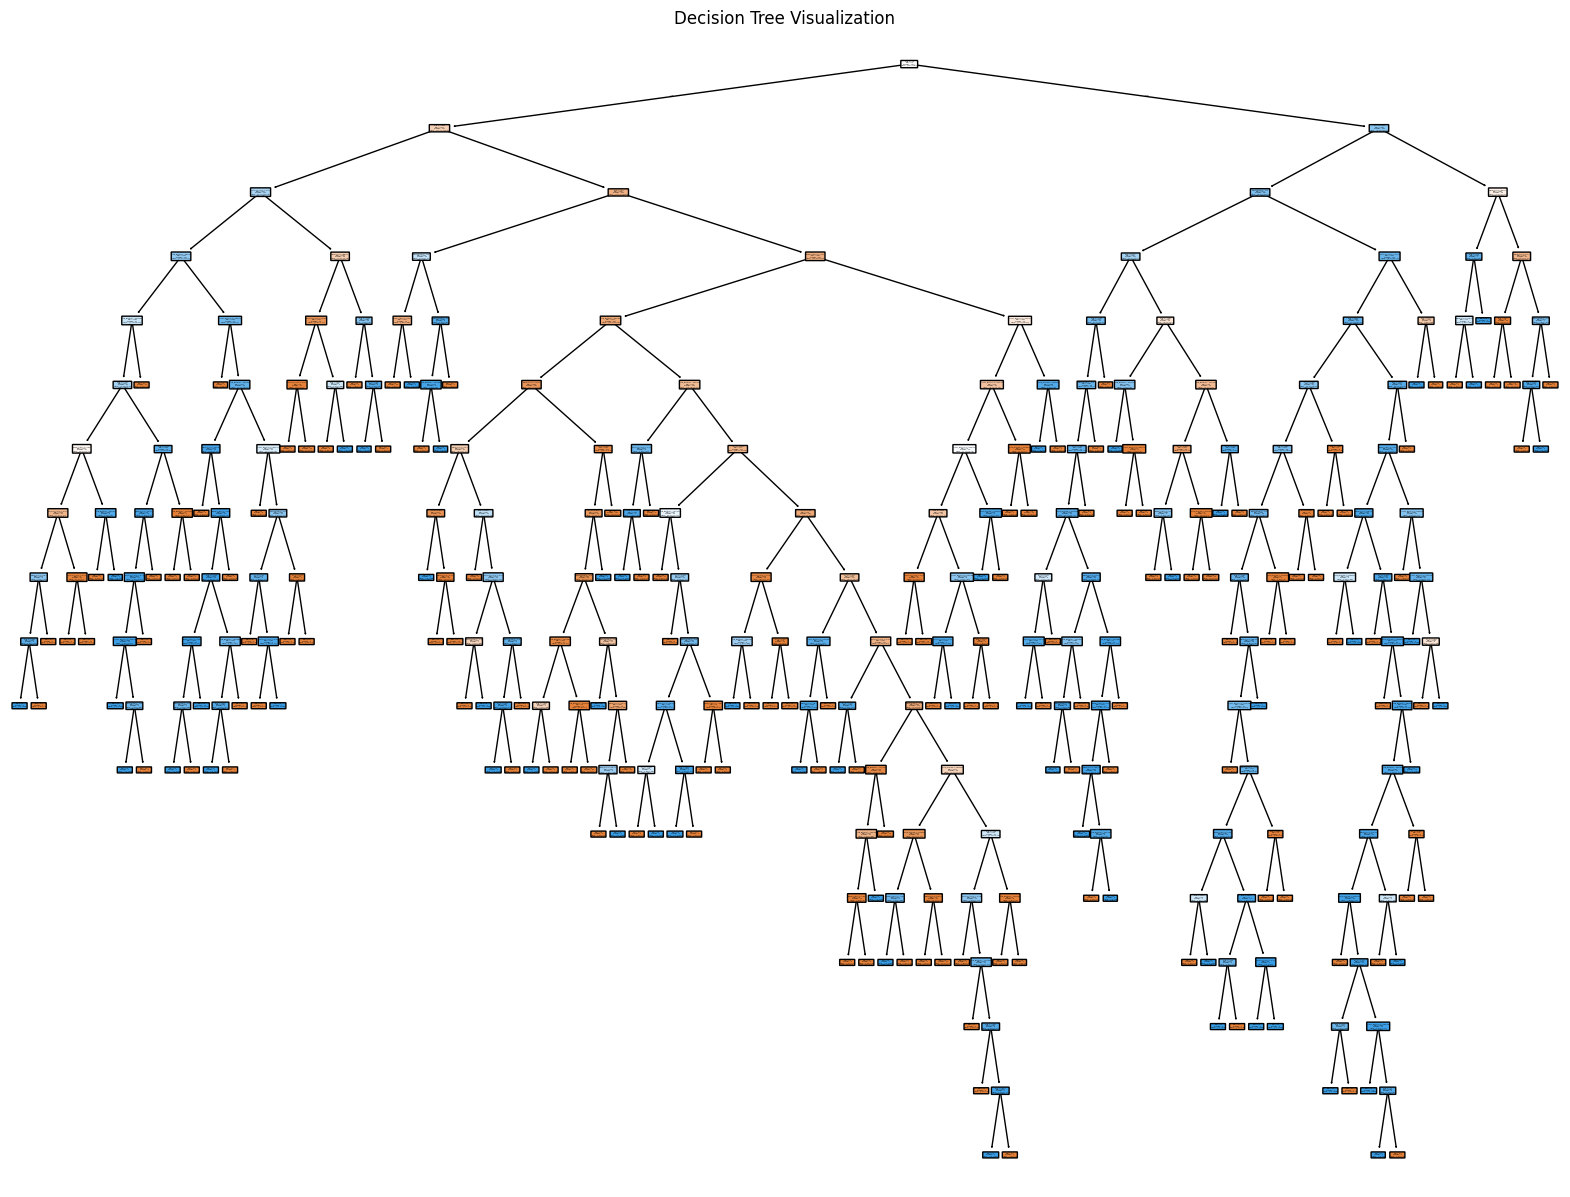

In [84]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plot_tree(dt_model, filled=True, feature_names=X.columns.tolist(), class_names=['No Injury', 'Injury'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

#### **Retrain the Decision Tree with Pruned Branches**

Pruned Decision Tree model trained successfully.


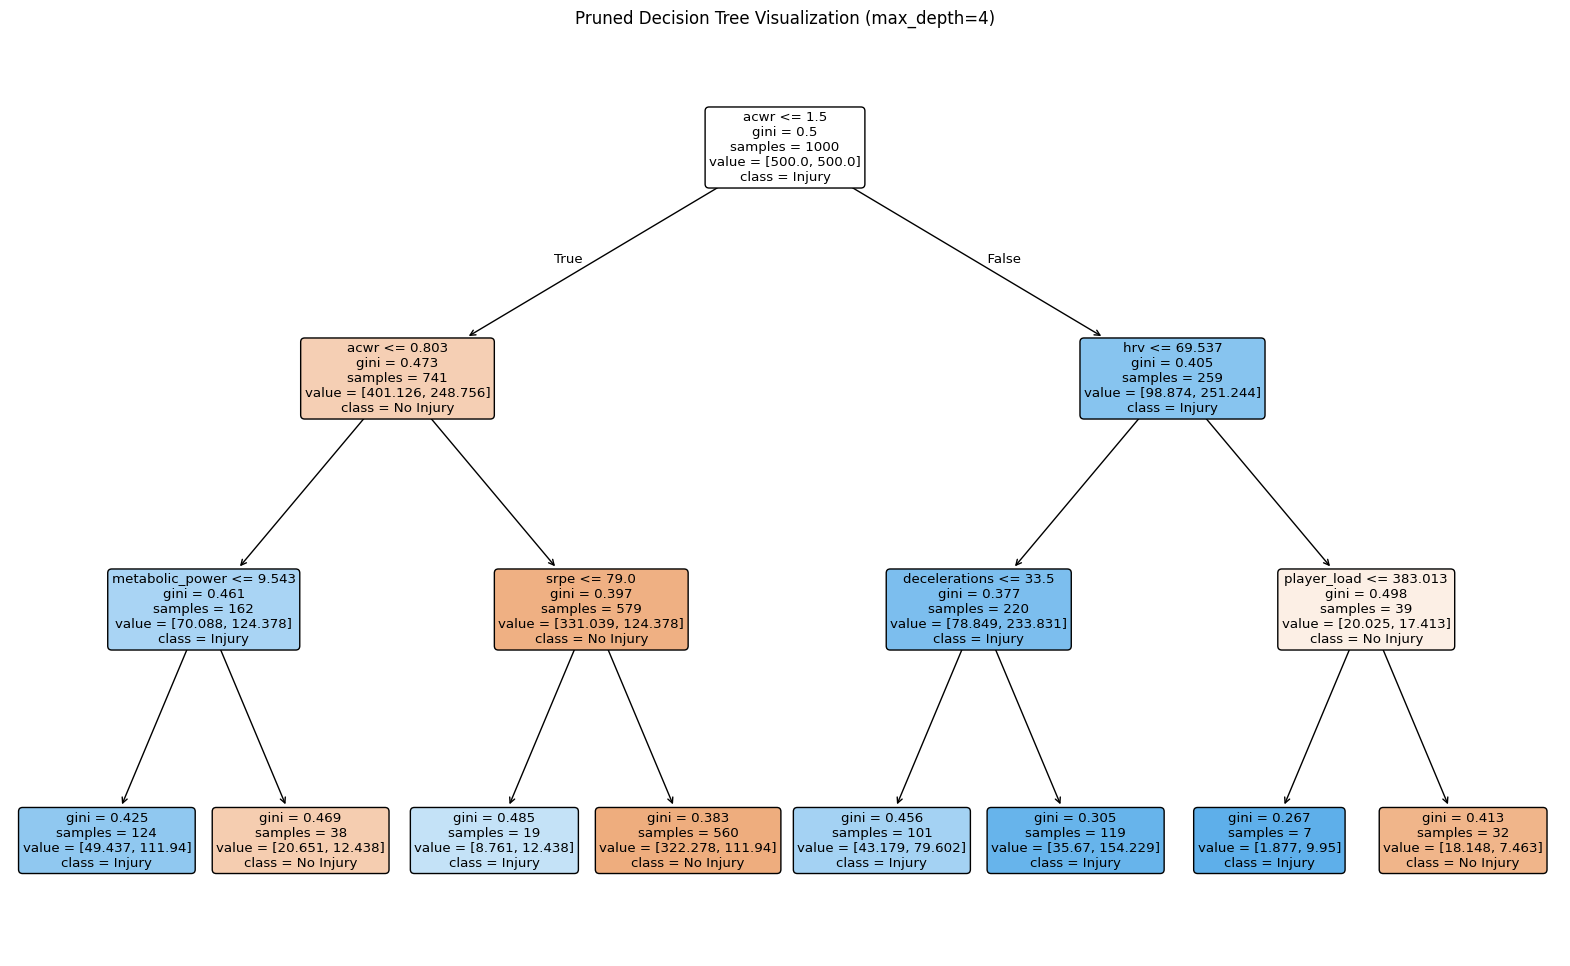

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Re-initialize the Decision Tree Classifier with a constrained max_depth and balanced class weights
dt_pruned_model = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')

# Train the pruned Decision Tree model on the training data
dt_pruned_model.fit(X_train, y_train)

print("Pruned Decision Tree model trained successfully.")

# Plot the pruned Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(dt_pruned_model, filled=True, feature_names=X.columns.tolist(), class_names=['No Injury', 'Injury'], rounded=True)
plt.title('Pruned Decision Tree Visualization (max_depth=4)')
plt.show()

This code **visualizes a pruned Decision Tree model** using `matplotlib` and `sklearn`.

### 1️⃣ Create a Large Figure

```python
plt.figure(figsize=(20, 12))
```

* Uses **`matplotlib`** to create a plotting canvas.
* `figsize=(20, 12)` makes the figure **20 inches wide and 12 inches tall**.
* A large size is used so the decision tree is easier to read.

---

### 2️⃣ Plot the Decision Tree

```python
plot_tree(
    dt_pruned_model,
    filled=True,
    feature_names=X.columns.tolist(),
    class_names=['No Injury', 'Injury'],
    rounded=True
)
```

This uses `plot_tree()` from **scikit-learn** to visualize the trained model.

#### 🔹 `dt_pruned_model`

* This is your **trained decision tree classifier**.
* It is “pruned” (limited in complexity).
* From the title, it likely has `max_depth=4`, meaning:

  * The tree can only grow 4 levels deep.
  * This reduces overfitting.

#### 🔹 `filled=True`

* Colors each node based on the predicted class.
* Darker color = higher purity (more confident prediction).

#### 🔹 `feature_names=X.columns.tolist()`

* Displays the actual **feature names** at each split.
* `X.columns.tolist()` converts your dataset column names into a list.

#### 🔹 `class_names=['No Injury', 'Injury']`

* Labels the output classes.
* Instead of showing 0 and 1, it shows:

  * `No Injury`
  * `Injury`

#### 🔹 `rounded=True`

* Makes node boxes have rounded corners for better appearance.

---

### 3️⃣ Add a Title

```python
plt.title('Pruned Decision Tree Visualization (max_depth=4)')
```

* Adds a descriptive title to the plot.
* Indicates that the tree was pruned using `max_depth=4`.

---

### 4️⃣ Display the Plot

```python
plt.show()
```

* Renders and displays the decision tree visualization.

---

# ✅ What the Entire Code Does

It creates a **large, readable visualization of a pruned decision tree classifier**, showing:

* The feature used at each split
* The threshold values
* The number of samples at each node
* Class distribution at each node
* Final predicted class (Injury / No Injury)
* Color intensity showing prediction confidence

---

# 🎯 Why This Is Useful

This visualization helps you:

* Understand how your model makes decisions
* Interpret which features are most important
* Check if pruning (max_depth=4) simplified the tree
* Present results in reports or presentations


This plot shows a **pruned decision tree** (max_depth = 4) for predicting sports injury risk, built from 1,000 samples (500 injured, 500 not injured). The root node splits on **acwr ≤ 1.5** (acute:chronic workload ratio), with balanced impurity (Gini = 0.5).

The left branch (acwr ≤ 1.5, 741 samples) leads to further splits on **acwr ≤ 0.803**, then **metabolic_power ≤ 9.543** and **srpe ≤ 79.0**. Notably, the leaf with *metabolic_power ≤ 9.543* has high injury prevalence: 124 samples, 49 injuries vs. 111 non-injuries (≈30% injury rate), and is labeled “class = Injury” — indicating the model predicts injury here. In contrast, the sibling leaf (*metabolic_power > 9.543*) has only 38 samples with 20 injuries (≈53% injury rate) but is labeled “class = No Injury”, suggesting the majority class rule misclassifies this high-risk node — a potential limitation.

The right branch (acwr > 1.5, 259 samples) splits on **hrv ≤ 69.537** (heart rate variability), then on **decelerations ≤ 33.5** and **player_load ≤ 383.013**. Most terminal nodes in this branch predict *Injury*, especially where decelerations are low (e.g., 220 samples, 78 injuries → ~35% injury rate).

Gini values decrease toward leaves (e.g., 0.267–0.469), indicating improved purity. However, several leaves still show mixed classes and relatively high Gini (>0.3), reflecting inherent uncertainty. The tree prioritizes workload (acwr) and recovery markers (hrv) as top predictors, aligning with sports science literature.

#### **ROC and AUC for the Pruned Decisin Tree**

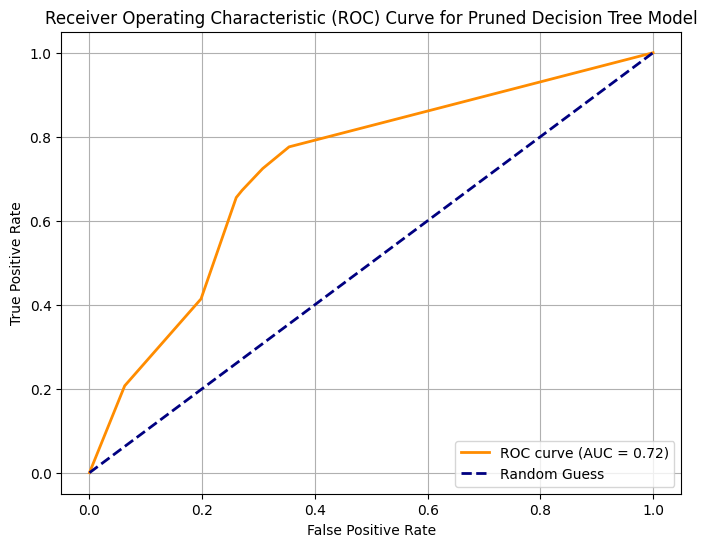

AUC for Pruned Decision Tree Model: 0.7229


In [97]:
y_pred_proba_dt_pruned = dt_pruned_model.predict_proba(X_test)[:, 1]
fpr_dt_pruned, tpr_dt_pruned, thresholds_dt_pruned = roc_curve(y_test, y_pred_proba_dt_pruned)
roc_auc_dt_pruned = auc(fpr_dt_pruned, tpr_dt_pruned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_pruned, tpr_dt_pruned, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt_pruned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Pruned Decision Tree Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for Pruned Decision Tree Model: {roc_auc_dt_pruned:.4f}")

### **Comparative Analysis of the Three Models**

In [94]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# --- Extract Metrics for KNN Model ---
# Accuracy is already calculated as `accuracy`
# AUC is already calculated as `roc_auc`

# Parse classification report for class 1 (Injury)
report_knn = classification_report(y_test, y_pred, output_dict=True)
precision_knn = report_knn['1']['precision']
recall_knn = report_knn['1']['recall']
f1_knn = report_knn['1']['f1-score']

# --- Extract Metrics for SVM Model ---
# Accuracy is already calculated as `accuracy_svm`
# AUC is already calculated as `roc_auc_svm`

# Parse classification report for class 1 (Injury)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
precision_svm = report_svm['1']['precision']
recall_svm = report_svm['1']['recall']
f1_svm = report_svm['1']['f1-score']

# --- Extract Metrics for Pruned Decision Tree Model ---
# Make predictions for the pruned DT model
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculate AUC for pruned DT
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Parse classification report for class 1 (Injury)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
precision_dt = report_dt['1']['precision']
recall_dt = report_dt['1']['recall']
f1_dt = report_dt['1']['f1-score']

In [98]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_svm, accuracy_dt],
    'Precision (Class 1)': [precision_knn, precision_svm, precision_dt],
    'Recall (Class 1)': [recall_knn, recall_svm, recall_dt],
    'F1-Score (Class 1)': [f1_knn, f1_svm, f1_dt],
    'AUC': [roc_auc, roc_auc_svm, roc_auc_dt]
})

# Set Model as index for better readability
comparison_df = comparison_df.set_index('Model')

print("\n--- Model Performance Comparison ---")
comparison_df


--- Model Performance Comparison ---


,Accuracy,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC
Model,,,,,
KNN,0.760,0.466667,0.241379,0.318182,0.611710
SVM,0.668,0.349398,0.500000,0.411348,0.630119
Decision Tree,0.724,0.365854,0.258621,0.303030,0.561602


Based on the evaluation metrics provided, the **best model depends on the objective**, but overall, the **SVM (Support Vector Machine)** appears to be the strongest choice.

First, although **KNN** has the highest **accuracy (0.760)**, accuracy alone can be misleading—especially if the dataset is imbalanced. In such cases, a model may predict the majority class well while performing poorly on the minority class (Class 1). This is evident in KNN’s **low recall (0.241)**, meaning it correctly identifies only about 24% of actual Class 1 cases. That is quite weak if detecting Class 1 (e.g., injury cases) is important.

The **Decision Tree** performs moderately, with accuracy of **0.724**, but it has the lowest AUC (**0.562**) among the three models. Its precision and recall are also relatively low, resulting in a weak F1-score (**0.303**). This suggests limited ability to distinguish between classes.

The **SVM**, while having lower accuracy (**0.668**), performs best in more meaningful metrics for Class 1 detection. It has the highest **recall (0.500)**, meaning it correctly identifies 50% of Class 1 cases—significantly better than KNN and the Decision Tree. It also has the highest **F1-score (0.411)**, which balances precision and recall. Additionally, SVM achieves the highest **AUC (0.630)**, indicating better overall discrimination between classes.

Therefore, if identifying Class 1 correctly is important, **SVM is the best model overall** because it provides better balance, higher recall, and superior AUC performance.
